# Judul  : Analisis Anggaran Penjualan dan Pemasaran Suatu Perusahaan

Membuat dataset Customer 360° degree dengan minimal 20 atribut dan menemukan informasi yang sangat berwawasan dan berharga.

Customer 360° degree adalah sebuah sistem yang digunakan oleh perusahaan untuk melihat sisi pelanggan dengan lebih luas (360 drajat). Hal tersebut meliputi terintegrasinya sistem perusahaan dengan informasi pelanggan, perangkat, channel maupun produk untuk meningkatkan pengalaman dalam berinteraksi dengan pelanggan dan memaksimalkan nilai yang akan diberikan kepada pelanggan.



# Import Library

In [1]:
#Import library 
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings ("ignore")

pd.set_option('display.max_columns', None)

# Read Data

In [2]:
df1 = pd.read_csv('KEY_SKU.csv')
df2 = pd.read_csv('Marketing_Spend.csv')
df3 = pd.read_csv('Online.csv')
df4 = pd.read_csv('Retail.csv')

# UNDERSTANDING DATA

### Meta Data
##### Data penjualan offline dan online dari sebuah perusahaan retail.

+ File marketing.csv :
Date [tanggal],
Offline spend [total uang untuk marketing offline],
Online spend [total uang untuk marketing online]

+ File offline_sales.csv :
InvoiceNo [id untuk invoice],
InvoiceDate [tanggal invoice],
StockCode [id untuk produk],
Quantity [total pembelian]

+ File online_sales.csv :
Transcation ID [id untuk transaksi online],
Date[tanggal transaksi],
Product SKU [kode untuk produk],
Product [deskripsi produk],
Product Category [kategori produk],
Quantity [total pembelian],
Avg. Price [rata-rata harga per penjual],
Revenue [total nilai transaksi (belum termasuk pajak)],
Tax [pajak transaksi],
Delivery [biaya pengantaran]

+ Product.csv :
Product SKU [kode untuk product]
StockCode [id untuk produk]

Kolom yang memiliki arti sama :
StockCode pada Product.csv dan StockCode pada Offline_sales.csv

In [3]:
info = [df1, df2, df3, df4]

for i in info:
    print('==='*15)
    print(i.info())
    print('==='*15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product SKU  1178 non-null   object
 1   StockCode    1178 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     365 non-null    object 
 1   Offline Spend  365 non-null    int64  
 2   Online Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54144 entries, 0 to 54143
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Transaction ID                 

## 1. KEY_SKU

SKU atau Stock Keeping Unit artinya barcode yang bisa dipindai. SKU paling sering dilihat di bagian label produk. Biasanya, SKU memiliki delapan atau lebih karakter yang terdiri dari kombinasi alfanumerik. SKU adalah solusi mudah bagi para retailer yang mau menjual barang dengan jumlah ribuan.

Digunakan dalam berbagai macam penjualan produk untuk mempermudah proses pelacakan persediaan.Dengan menggunakan SKU dan POS (point-of-sale) yang dapat di-scan, maka kamu dengan mudah dapat mengetahui produk mana yang harus stok ulang.

Kolom :
- Product SKU
- StockCode

In [4]:
df1.shape

(1178, 2)

In [5]:
df1.dtypes

Product SKU    object
StockCode       int64
dtype: object

## 2. Marketing_Spend

Anggaran atau biaya keseluruhan yang dialokasikan perusahaan untuk aktivitas pemasaran

Kolom : 
- Date [tanggal], 
- Offline spend [total uang untuk marketing offline], 
- Online spend [total uang untuk marketing online]


In [6]:
df2.shape

(365, 3)

In [7]:
df2['Unnamed: 0'] = pd.to_datetime(df2['Unnamed: 0'])

In [8]:
df2.rename(columns={"Unnamed: 0": "Date"}, inplace=True)

In [9]:
df2.dtypes

Date             datetime64[ns]
Offline Spend             int64
Online Spend            float64
dtype: object

In [10]:
df2.head(2)

Date  Offline Spend  Online Spend
0 2017-01-01           4500       2424.50
1 2017-01-02           4500       3480.36

## 3. Online


Kolom :
- Transcation ID [id untuk transaksi online], 
- Date[tanggal transaksi], Product SKU [kode untuk produk], 
- Product [deskripsi produk], Product Category [kategori produk], 
- Quantity [total pembelian], Avg. Price [rata-rata harga per penjual], 
- Revenue [total nilai transaksi (belum termasuk pajak)], 
- Tax [pajak transaksi], 
- Delivery [biaya pengantaran]

In [11]:
df3['Date']= df3['Date'].astype("str")

In [12]:
df3.update(pd.DataFrame({'Date':[Date[:4]+'-'+Date[4:6]+'-'+Date[6:8] if len(Date) == 8 else (Date) for Date in df3['Date']]}))

In [13]:
df3['Date'] = pd.to_datetime(df3['Date'])

In [14]:
df3.sort_values(by = 'Date', inplace = True)

In [15]:
df3.dtypes

Transaction ID                                     int64
Date                                      datetime64[ns]
Product SKU                                       object
Product                                           object
Product Category (Enhanced E-commerce)            object
Quantity                                         float64
Avg. Price                                       float64
Revenue                                          float64
Tax                                              float64
Delivery                                         float64
dtype: object

In [16]:
df3.head(2)

Transaction ID       Date     Product SKU  \
54143           16679 2017-01-01  GGOENEBJ079499   
54074           16710 2017-01-01  GGOENEBJ079499   

                                                 Product  \
54143  Nest® Learning Thermostat 3rd Gen-USA - Stainl...   
54074  Nest® Learning Thermostat 3rd Gen-USA - Stainl...   

      Product Category (Enhanced E-commerce)  Quantity  Avg. Price  Revenue  \
54143                               Nest-USA       1.0      153.71    149.0   
54074                               Nest-USA       1.0      153.71    149.0   

         Tax  Delivery  
54143  13.61      6.50  
54074  11.11     28.78

## 4. Retail


Kolom :
- InvoiceNo [id untuk invoice], 
- InvoiceDate [tanggal invoice], 
- StockCode [id untuk produk], 
- Quantity [total pembelian]

In [17]:
df4.shape

(181247, 4)

In [18]:
df4['InvoiceNo'].duplicated().sum()

164725

In [19]:
df4.rename(columns={"InvoiceDate": "Date"}, inplace=True)

In [20]:
sd = df4.drop_duplicates(subset=['InvoiceNo'])
sd

InvoiceNo        Date  StockCode  Quantity
0          536598  2017-01-01      21421         1
3          536599  2017-01-01      20749         2
5          536600  2017-01-01      21730         2
6          536602  2017-01-01      21871         1
10         536604  2017-01-01      22189         1
...           ...         ...        ...       ...
181175     580133  2017-12-31      16169         2
181191     580134  2017-12-31      21194         1
181195     580135  2017-12-31      22086         1
181199     580136  2017-12-31      16169         1
181228     580137  2017-12-31      21731         1

[16522 rows x 4 columns]

In [21]:
retailm = sd.groupby(['Date']).agg({'InvoiceNo': 'count' }).reset_index()
retailm

Date  InvoiceNo
0    2017-01-01        113
1    2017-01-02         59
2    2017-01-04         79
3    2017-01-05         92
4    2017-01-06         72
..          ...        ...
287  2017-12-26         52
288  2017-12-27         88
289  2017-12-28        109
290  2017-12-29         96
291  2017-12-31        108

[292 rows x 2 columns]

In [22]:
len(df4['Date'].unique())

292

In [23]:
df4['Date'] = pd.to_datetime(df4['Date'])

# Feature Engineering



In [24]:
df3['Income_Net'] = df3['Revenue'] - df3['Tax'] - df3['Delivery']

In [25]:
online = df3.groupby(['Date'])['Quantity'].sum().reset_index()
online.head()

Date  Quantity
0 2017-01-01     399.0
1 2017-01-02     265.0
2 2017-01-03     823.0
3 2017-01-04     621.0
4 2017-01-05    2683.0

In [26]:
online2 = df3.groupby(['Date', 'Product SKU'])['Quantity'].sum().reset_index()
online2.head()

Date     Product SKU  Quantity
0 2017-01-01  GGOEADHB014799      10.0
1 2017-01-01  GGOEADWQ015699       1.0
2 2017-01-01  GGOEAFKQ020599       1.0
3 2017-01-01  GGOEGAAB010516       5.0
4 2017-01-01  GGOEGAAB010517       1.0

### Agregasi Beberapa Tipe

In [27]:
online3 = df3.groupby(['Date']).agg({'Quantity': 'sum', "Delivery" : 'sum',
                                                      'Revenue': 'sum',
                                                      'Tax': 'sum',
                                                      'Product SKU': 'count',
                                                      'Transaction ID': 'count',
                                                     }).reset_index()
online3.head()

Date  Quantity  Delivery   Revenue      Tax  Product SKU  \
0 2017-01-01     399.0   1114.73  33051.81  1438.67           94   
1 2017-01-02     265.0    904.50  25298.45  1629.62          120   
2 2017-01-03     823.0   3688.76  40281.79  2948.26          211   
3 2017-01-04     621.0   1534.44  52043.85  4019.40          174   
4 2017-01-05    2683.0   2602.86  66710.36  3979.97          198   

   Transaction ID  
0              94  
1             120  
2             211  
3             174  
4             198

In [28]:
retail = df4.groupby(['Date']).agg({'Quantity': 'sum' }).reset_index()
retail.head()


Date  Quantity
0 2017-01-01      3229
1 2017-01-02      4848
2 2017-01-04      5406
3 2017-01-05      6645
4 2017-01-06      7877

In [29]:
online3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            365 non-null    datetime64[ns]
 1   Quantity        365 non-null    float64       
 2   Delivery        365 non-null    float64       
 3   Revenue         365 non-null    float64       
 4   Tax             365 non-null    float64       
 5   Product SKU     365 non-null    int64         
 6   Transaction ID  365 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 20.1 KB


In [30]:
df = pd.merge(df2,online3, on='Date', how = 'outer')
df = pd.merge(df,retail, on='Date', how = 'outer')
retailm=retailm.rename(columns = {"InvoiceDate": "Date"})
retailm['Date'] = pd.to_datetime(retailm['Date'])
retailm

Date  InvoiceNo
0   2017-01-01        113
1   2017-01-02         59
2   2017-01-04         79
3   2017-01-05         92
4   2017-01-06         72
..         ...        ...
287 2017-12-26         52
288 2017-12-27         88
289 2017-12-28        109
290 2017-12-29         96
291 2017-12-31        108

[292 rows x 2 columns]

In [31]:
df= pd.merge(df,retailm, on='Date', how = 'outer')
df.isnull().sum()

Date               0
Offline Spend      0
Online Spend       0
Quantity_x         0
Delivery           0
Revenue            0
Tax                0
Product SKU        0
Transaction ID     0
Quantity_y        73
InvoiceNo         73
dtype: int64

In [32]:
df.rename(columns={"Quantity_x": "Quantity_online", "Quantity_y" : "Quantity_offline"}, inplace=True)

### Kolom Income_Online

Income Total adalah pendapatan bersih yang didapat secara online.

In [33]:
# Menambahkan kolom Income_Online

df['Income_online'] = df['Revenue'] - df3['Tax'] - df3['Delivery']

### kolom Spend_total

Spend Total merupakan jumlah total pengeluaran promosi offline dan online

In [34]:
# Menambahkan kolom Spend_total

df['Spend_total'] = df['Offline Spend'] + df['Online Spend']

In [35]:
df =df.set_index('Date')

### Kolom Year, Month, Hari

In [36]:
# Menambahkan kolom Year, Month, Hari


df['Year'] = df.index.year
df['Month'] = df.index.month
df['Hari'] = df.index.day_name()

### Kolom Offline_Spend_Cat dan Online_Spend_Cat

In [37]:
# Membuat kategori terhadap Offline dan Online Spend

a=[]
b=[]
f=[]

for i in df['Offline Spend']:
    if i <1500:
        a.append('Low')
    elif i <3000:
        a.append('Medium')
    else:
        a.append('High')
        
for i in df['Online Spend']:
    if i <1500:
        b.append('Low')
    elif i <3000:
        b.append('Medium')
    else:
        b.append('High')

for i in df['Month']:
    if i < 4:
        f.append('1')
    elif i < 7:
        f.append('2')
    elif i < 9:
        f.append('3')
    else:
        f.append('4')

- Offline_Spend_Cat adalah Kategori untuk pengeluaran promosi secara Offline
- Online_Spend_Cat adalah Kategori untuk pengeluaran promosi secara Online

In [38]:
# Menambahkan kolom Offline_Spend_Cat dan Online_Spend_Cat

df['Quarter']=f
df['Offline_Spend_Cat']= a
df['Online_Spend_Cat']= b

### Kolom Best Income Online, Product_SKU_Huruf, dan Product_SKU_Angka

In [39]:
# Memisah Product SKU yang bertipe Huruf dan Angaka menjadi 2 kolom berbeda

ProductSku = pd.DataFrame({'SKU':[SKU[:8]+'-'+SKU[8:] for SKU in df3['Product SKU']]})

# new data frame with split value columns
ProductSku = ProductSku["SKU"].str.split("-", expand = True)
ProductSku.rename(columns = {0: "Product SKU Huruf", 1: "Product SKU Angka"},inplace = True)
ProductSku

Product SKU Huruf Product SKU Angka
0              GGOENEBJ            079499
1              GGOENEBJ            079499
2              GGOEGAAB            010517
3              GGOEADHB            014799
4              GGOEADWQ            015699
...                 ...               ...
54139          GGOEGDHJ            087399
54140          GGOENEBB            078899
54141          GGOENEBJ            079499
54142          GGOENEBQ            078999
54143          GGOENEBQ            079099

[54144 rows x 2 columns]

In [40]:
# Membuat kolom Letter of Product SKU dan Number of Product SKU 
# membuat pivot table berdasarkan Date, Letter of Product SKU, dan Number of Product SKU terhadap nilai sum dari Income_Net

df3["Letter of Product SKU"] = ProductSku["Product SKU Huruf"]
df3["Number of Product SKU"] = ProductSku["Product SKU Angka"]



Income = pd.pivot_table(df3,index= ['Date','Letter of Product SKU','Number of Product SKU'],values = 'Income_Net',aggfunc = 'sum' ,observed = True)
Income.reset_index(inplace= True)
Income.set_index(['Date'],inplace = True)
Income

Letter of Product SKU Number of Product SKU  Income_Net
Date                                                              
2017-01-01              GGOEAAEQ                091616       61.12
2017-01-01              GGOEAKDH                019899       27.17
2017-01-01              GGOEGAEB                091114      132.78
2017-01-01              GGOEGAEB                091117      241.78
2017-01-01              GGOEGAEJ                028116      128.32
...                          ...                   ...         ...
2017-12-31              GGOENEBQ                079199       40.05
2017-12-31              GGOEWEBB                082699      131.81
2017-12-31              GGOEYAAB                031816      100.88
2017-12-31              GGOEYAFB                073115      136.91
2017-12-31              GGOEYOBR                078599        2.37

[30516 rows x 3 columns]

In [41]:
# Mengambil nilai Unique date dari Tahun bulan januari hingga Desember pada Tahun 2017

Date_Unique = df2['Date'].astype(str)

Date_Unique = Date_Unique.unique().tolist()
len(Date_Unique)

# Mengambil best Income Online Tertinggi per Transaksi Setiap Harinya
Product_SKU_Huruf = []
Product_SKU_Angka = []
Best_Income = []
angka = 0
for i in Date_Unique :
    Rend = Income.loc[i].max()
#     print(Rend)
    Product_SKU_Huruf.append(Rend[0])
    Product_SKU_Angka.append(Rend[1])
    Best_Income.append(Rend[2])

    angka += 1
    
print(angka)

# Memasukkan Kolom baru ke Dataframe df
df['Letter of Product SKU'] = Product_SKU_Huruf
df['Number of Product SKU'] = Product_SKU_Angka
df['Best Income Online'] = Best_Income

df.head(2)

365


Offline Spend  Online Spend  Quantity_online  Delivery   Revenue  \
Date                                                                           
2017-01-01           4500       2424.50            399.0   1114.73  33051.81   
2017-01-02           4500       3480.36            265.0    904.50  25298.45   

                Tax  Product SKU  Transaction ID  Quantity_offline  InvoiceNo  \
Date                                                                            
2017-01-01  1438.67           94              94            3229.0      113.0   
2017-01-02  1629.62          120             120            4848.0       59.0   

            Income_online  Spend_total  Year  Month    Hari Quarter  \
Date                                                                  
2017-01-01       32997.38      6924.50  2017      1  Sunday       1   
2017-01-02       25258.81      7980.36  2017      1  Monday       1   

           Offline_Spend_Cat Online_Spend_Cat Letter of Product SKU  \
Date                                                                  
2017-01-01              High           Medium              GGOEYAEJ   
2017-01-02              High             High              GGOEYALQ   

           Number of Product SKU  Best Income Online  
Date                                                  
2017-01-01                093499             4980.28  
2017-01-02                093999             2277.35

### Kolom Tara

In [42]:
df['Tara']= df['Tax'] + df['Delivery']
df

Offline Spend  Online Spend  Quantity_online  Delivery   Revenue  \
Date                                                                           
2017-01-01           4500       2424.50            399.0   1114.73  33051.81   
2017-01-02           4500       3480.36            265.0    904.50  25298.45   
2017-01-03           4500       1576.38            823.0   3688.76  40281.79   
2017-01-04           4500       2928.55            621.0   1534.44  52043.85   
2017-01-05           4500       4055.30           2683.0   2602.86  66710.36   
...                   ...           ...              ...       ...       ...   
2017-12-27           4000       3396.87            280.0    777.90  23159.15   
2017-12-28           4000       3246.84            114.0    680.58  20478.14   
2017-12-29           4000       2546.58            121.0    602.87  18151.47   
2017-12-30           4000        674.31            121.0    411.18  13228.39   
2017-12-31           4000       2058.75            112.0    483.44  16947.29   

                Tax  Product SKU  Transaction ID  Quantity_offline  InvoiceNo  \
Date                                                                            
2017-01-01  1438.67           94              94            3229.0      113.0   
2017-01-02  1629.62          120             120            4848.0       59.0   
2017-01-03  2948.26          211             211               NaN        NaN   
2017-01-04  4019.40          174             174            5406.0       79.0   
2017-01-05  3979.97          198             198            6645.0       92.0   
...             ...          ...             ...               ...        ...   
2017-12-27  1483.39          104             104            4425.0       88.0   
2017-12-28  1333.76           80              80            5362.0      109.0   
2017-12-29  1087.96           89              89            4523.0       96.0   
2017-12-30   651.29           61              61               NaN        NaN   
2017-12-31   955.61           67              67            3250.0      108.0   

            Income_online  Spend_total  Year  Month       Hari Quarter  \
Date                                                                     
2017-01-01       32997.38      6924.50  2017      1     Sunday       1   
2017-01-02       25258.81      7980.36  2017      1     Monday       1   
2017-01-03       40263.23      6076.38  2017      1    Tuesday       1   
2017-01-04       52033.53      7428.55  2017      1  Wednesday       1   
2017-01-05       66695.55      8555.30  2017      1   Thursday       1   
...                   ...          ...   ...    ...        ...     ...   
2017-12-27       23115.57      7396.87  2017     12  Wednesday       4   
2017-12-28       20434.56      7246.84  2017     12   Thursday       4   
2017-12-29       18135.47      6546.58  2017     12     Friday       4   
2017-12-30       13205.84      4674.31  2017     12   Saturday       4   
2017-12-31       16926.79      6058.75  2017     12     Sunday       4   

           Offline_Spend_Cat Online_Spend_Cat Letter of Product SKU  \
Date                                                                  
2017-01-01              High           Medium              GGOEYAEJ   
2017-01-02              High             High              GGOEYALQ   
2017-01-03              High           Medium              GGOEYAEJ   
2017-01-04              High           Medium              GGOEYAEJ   
2017-01-05              High             High              GGOEYAEJ   
...                      ...              ...                   ...   
2017-12-27              High             High              GGOEYOLR   
2017-12-28              High             High              GGOEWFKA   
2017-12-29              High           Medium              GGOEYHPB   
2017-12-30              High              Low              GGOEYOCR   
2017-12-31              High           Medium              GGOEYOBR   

           Number of Product S

### Kolom Quantity Total

In [43]:
df.fillna(0,inplace=True)

In [44]:
df['Quantity_Total']= df['Quantity_online']+df['Quantity_offline']

In [45]:
df

Offline Spend  Online Spend  Quantity_online  Delivery   Revenue  \
Date                                                                           
2017-01-01           4500       2424.50            399.0   1114.73  33051.81   
2017-01-02           4500       3480.36            265.0    904.50  25298.45   
2017-01-03           4500       1576.38            823.0   3688.76  40281.79   
2017-01-04           4500       2928.55            621.0   1534.44  52043.85   
2017-01-05           4500       4055.30           2683.0   2602.86  66710.36   
...                   ...           ...              ...       ...       ...   
2017-12-27           4000       3396.87            280.0    777.90  23159.15   
2017-12-28           4000       3246.84            114.0    680.58  20478.14   
2017-12-29           4000       2546.58            121.0    602.87  18151.47   
2017-12-30           4000        674.31            121.0    411.18  13228.39   
2017-12-31           4000       2058.75            112.0    483.44  16947.29   

                Tax  Product SKU  Transaction ID  Quantity_offline  InvoiceNo  \
Date                                                                            
2017-01-01  1438.67           94              94            3229.0      113.0   
2017-01-02  1629.62          120             120            4848.0       59.0   
2017-01-03  2948.26          211             211               0.0        0.0   
2017-01-04  4019.40          174             174            5406.0       79.0   
2017-01-05  3979.97          198             198            6645.0       92.0   
...             ...          ...             ...               ...        ...   
2017-12-27  1483.39          104             104            4425.0       88.0   
2017-12-28  1333.76           80              80            5362.0      109.0   
2017-12-29  1087.96           89              89            4523.0       96.0   
2017-12-30   651.29           61              61               0.0        0.0   
2017-12-31   955.61           67              67            3250.0      108.0   

            Income_online  Spend_total  Year  Month       Hari Quarter  \
Date                                                                     
2017-01-01       32997.38      6924.50  2017      1     Sunday       1   
2017-01-02       25258.81      7980.36  2017      1     Monday       1   
2017-01-03       40263.23      6076.38  2017      1    Tuesday       1   
2017-01-04       52033.53      7428.55  2017      1  Wednesday       1   
2017-01-05       66695.55      8555.30  2017      1   Thursday       1   
...                   ...          ...   ...    ...        ...     ...   
2017-12-27       23115.57      7396.87  2017     12  Wednesday       4   
2017-12-28       20434.56      7246.84  2017     12   Thursday       4   
2017-12-29       18135.47      6546.58  2017     12     Friday       4   
2017-12-30       13205.84      4674.31  2017     12   Saturday       4   
2017-12-31       16926.79      6058.75  2017     12     Sunday       4   

           Offline_Spend_Cat Online_Spend_Cat Letter of Product SKU  \
Date                                                                  
2017-01-01              High           Medium              GGOEYAEJ   
2017-01-02              High             High              GGOEYALQ   
2017-01-03              High           Medium              GGOEYAEJ   
2017-01-04              High           Medium              GGOEYAEJ   
2017-01-05              High             High              GGOEYAEJ   
...                      ...              ...                   ...   
2017-12-27              High             High              GGOEYOLR   
2017-12-28              High             High              GGOEWFKA   
2017-12-29              High           Medium              GGOEYHPB   
2017-12-30              High              Low              GGOEYOCR   
2017-12-31              High           Medium              GGOEYOBR   

           Number of Product S

# Modelling (INSIGHT)

## Spend Total & Income Online

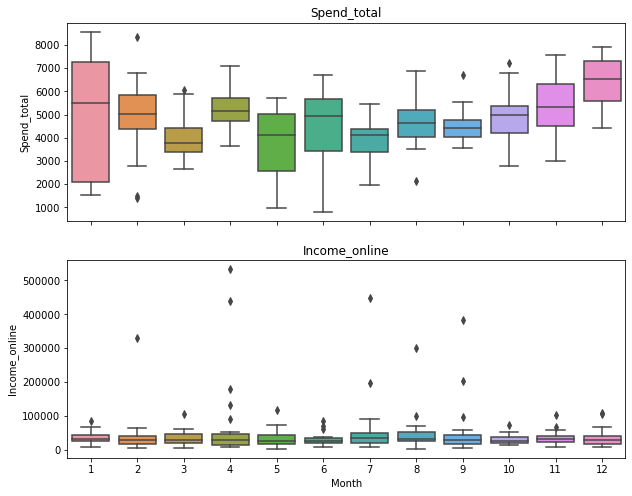

In [46]:
fig, axes =plt.subplots(2,1,figsize=(10,8),sharex=True)
for name, ax in zip(['Spend_total','Income_online'],axes):
    sns.boxplot(data=df.loc['2017':], x='Month',y=name, ax=ax)
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

Spend Total merupakan jumlah total pengeluaran promosi offline dan online. Income Online adalah pendapatan bersih yang didapat secara online.

Pada bulan 1 mengeluarkan total dana promosi offline dan online paling besar. pada bulan 7 mengeluarkan dana promosi offline dan online paling kecil.

## Perbandingan jumlah pelanggan online dan offline

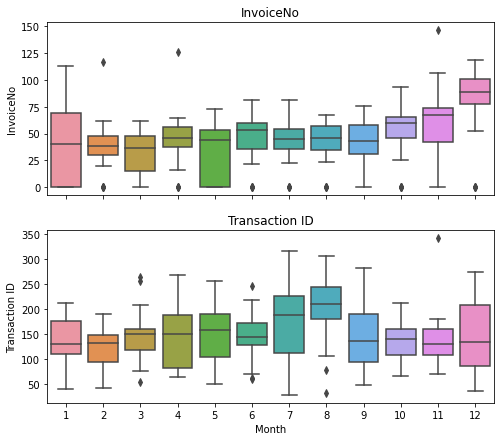

In [47]:
fig, axes =plt.subplots(2,1,figsize=(8,7),sharex=True)
for name, ax in zip(['InvoiceNo','Transaction ID'],axes):
    sns.boxplot(data=df.loc['2017':], x='Month',y=name, ax=ax)
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

InvoiceNo merupakan jumlah banyaknya transaksi yang terjadi pada penjualan offline. Transaction ID adalah jumlah banyaknya transaksi yang terjadi pada penjualan online.

pada bulan 12 terjadi transaksi offline terbanyak. pada bulan 2 terjadi transaksi offline paling sedikit. pada bulan 8 terjadi transaksi online paling banyak. pada bulan 2 terjadi transaksi online paling sedikit. sehingga terdapat kesamaan antara jumlah transaksi offline dan online yaitu sama-sama terjadi transaksi paling sedikit pada bulan 2.

## Perbandingan pendapatan online tiap bulan dan tiap hari

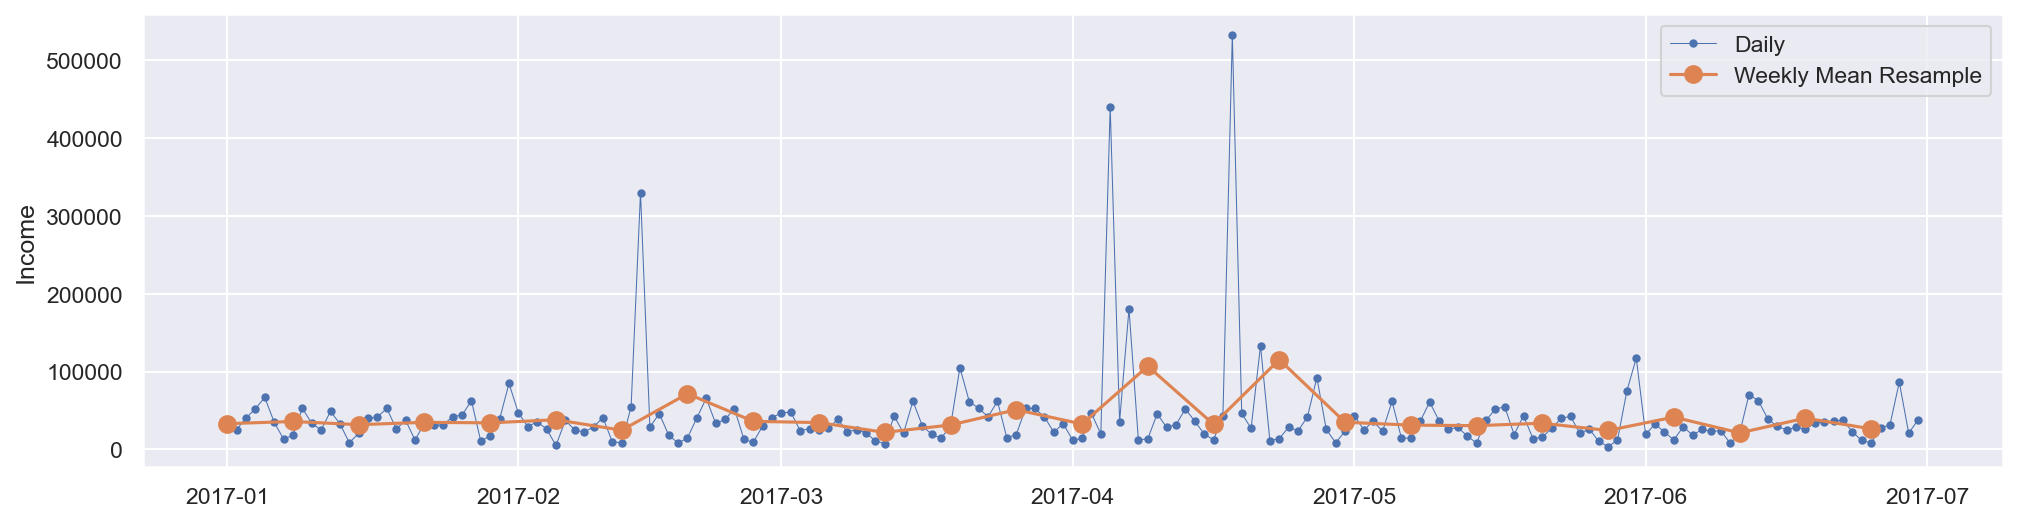

In [48]:
sns.set(rc={'figure.figsize':(16,4)})
plt.rcParams['figure.dpi']=150

colum = ['Income_online']
power_weekly_mean =df[colum].resample('W').mean()

start, end ='2017-01', '2017-06'
fig, ax= plt.subplots()
ax.plot(df.loc[start:end,'Income_online'], marker='.', linestyle='-',linewidth=0.5,label ='Daily')
ax.plot(power_weekly_mean.loc[start:end,'Income_online'], marker='o', markersize=8,linestyle='-',label='Weekly Mean Resample')
ax.set_ylabel('Income')
ax.legend();

terlihat pada grafik, terdapat lonjakan pendapatan pada penjualan online pada pertengahan bulan februari. dan terlihat juga terdapat 2 lonjakan pendapatan penjualan online, 2 lonjakan tersebut dipisahkan dengan sebuah penurunan yang tidak sedikit, namun bisa melonjak kembali pada lonjakan kedua pada pertengahan bulan April sebelum akhirnya terjadi penurunan kembali pada akhir bulan april.

## Perbandingan mingguan dan bulanan dari pendapatan online

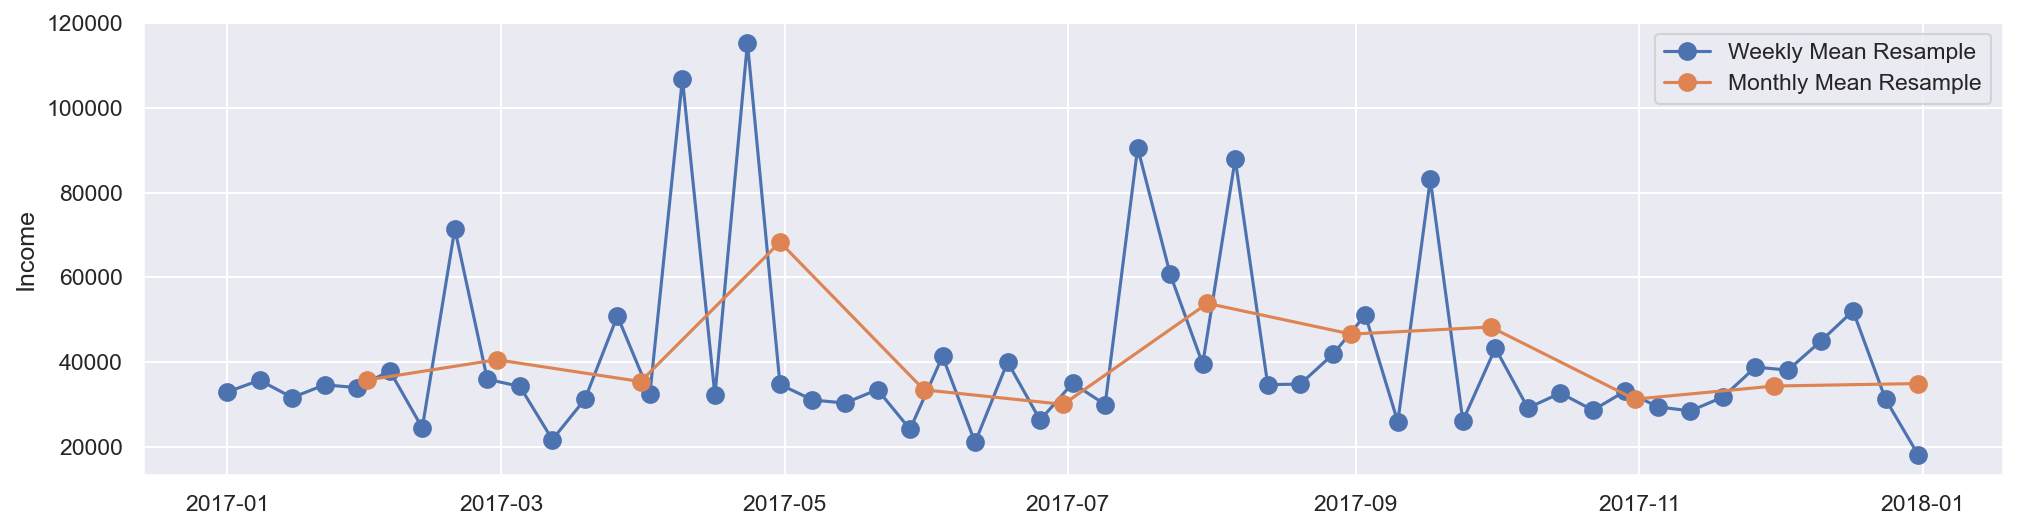

In [49]:
colum = ['Income_online']
power_weekly_mean =df[colum].resample('W').mean()
power_monthly_mean =df[colum].resample('M').mean()
start, end ='2017-01', '2017-12'
fig, ax= plt.subplots()
ax.plot(power_weekly_mean.loc[start:end,'Income_online'], marker='o', markersize=8,linestyle='-',label='Weekly Mean Resample')
ax.plot(power_monthly_mean.loc[start:end,'Income_online'], marker='o', markersize=8,linestyle='-',label='Monthly Mean Resample')
ax.set_ylabel('Income')
ax.legend();

pada grafik rata-rata pendapatan penjualan online tiap bulan, sangat terlihat jelas pada bulan april merupakan rata-rata pendapatan bulanan tertinggi dibandingkan bulan lain pada tahun 2017

## Jumlah barang yang terjual pada online dalam setahun 

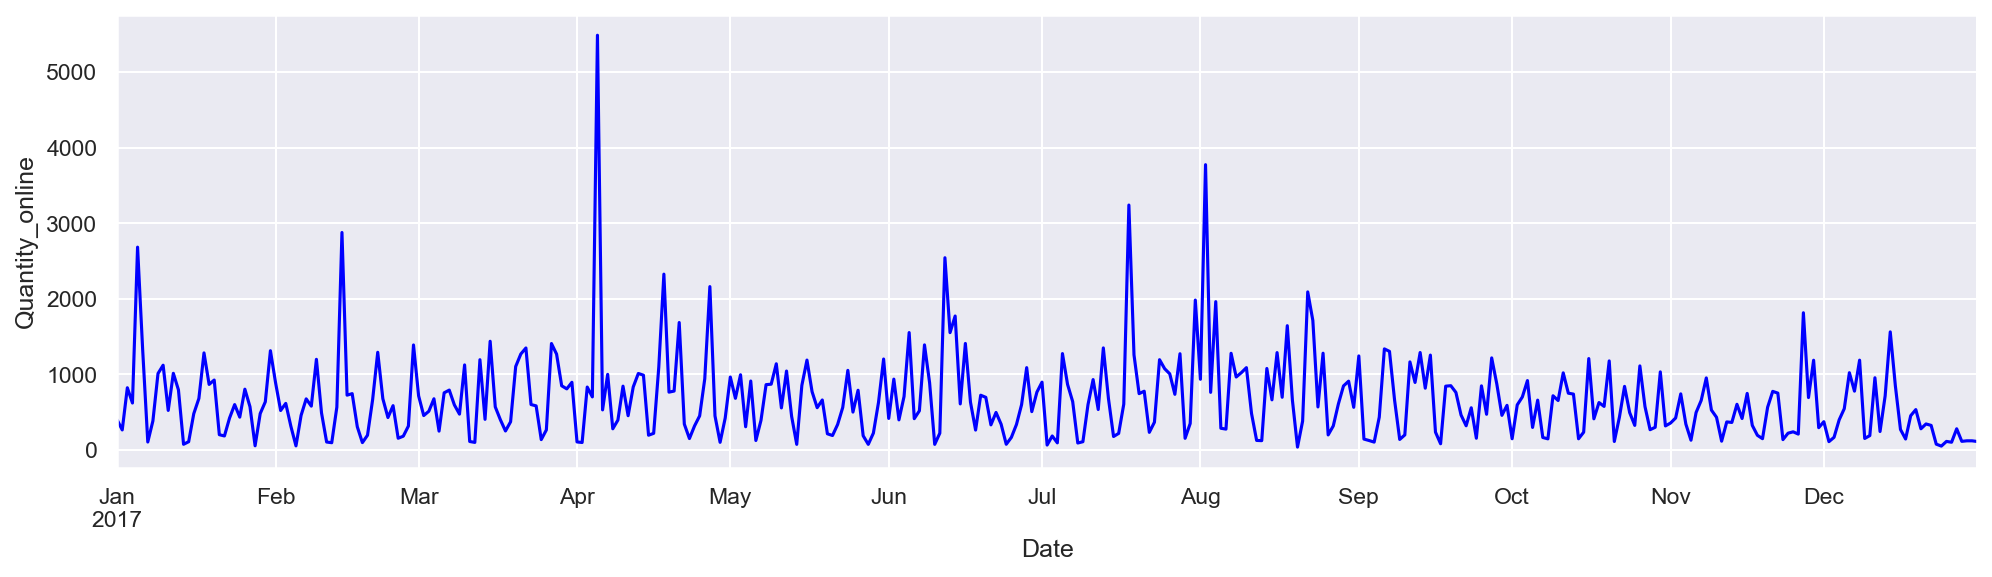

In [50]:
ax =df.loc['2017','Quantity_online'].plot(color='blue')
ax.set_ylabel('Quantity_online');

In [51]:
df.loc['2017','Quantity_online'].sum()

245706.0

Quantity online adalah jumlah barang yang terjual pada penjualan online setiap harinya.

pada grafik, terlihat pada bulan april terdapat sangat banyak barang yang terjual pada bulan tersebut. hal ini juga berkaitan dengan banyaknya pendapatan penjualan online yang didapat pada bulan april. sehingga banyaknya pendapatan penjualan online pada bulan april tersebut dipengaruhi oleh banyaknya barang yang terjual pada bulan april.

## Jumlah barang yang terjual pada offline dalam setahun 

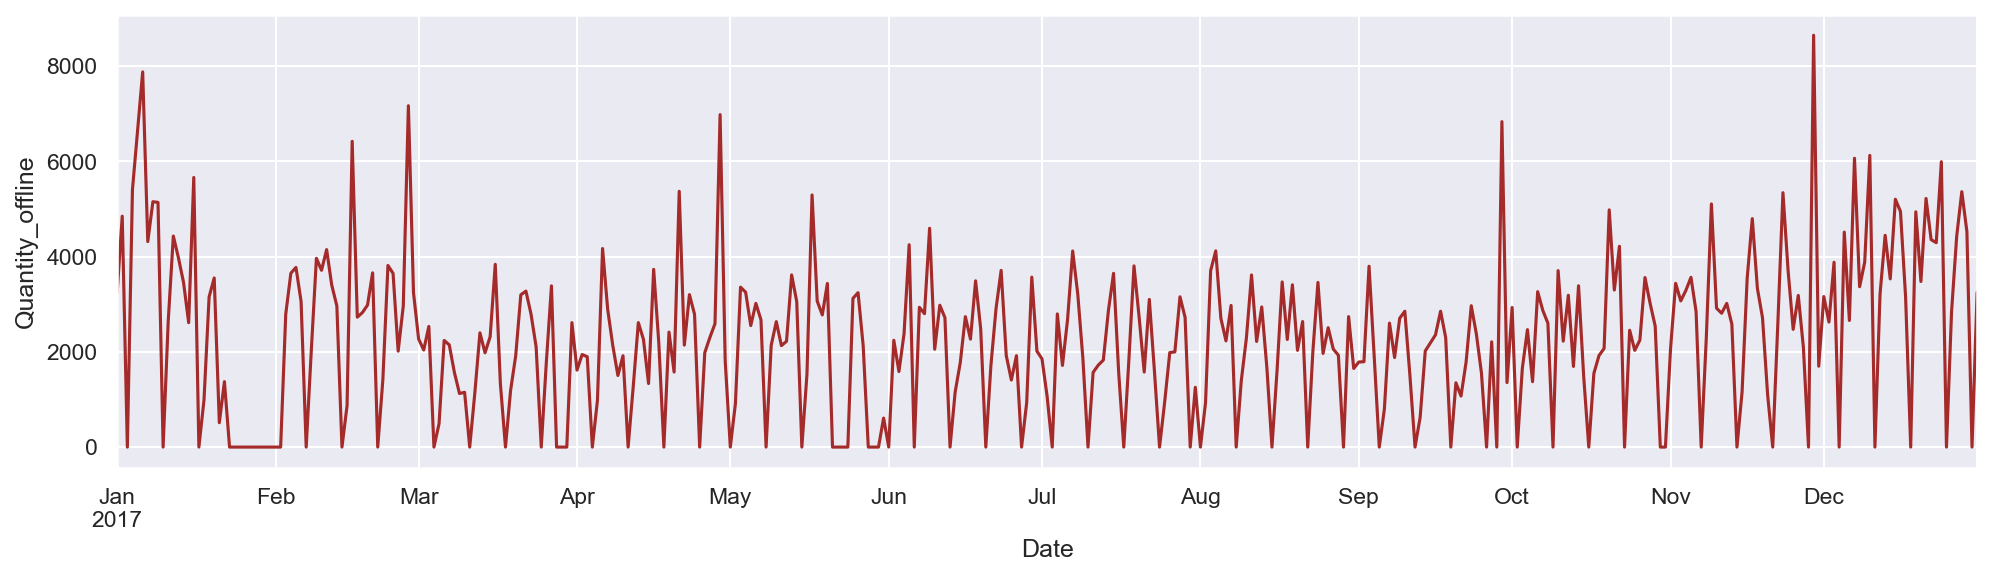

In [52]:
ax =df.loc['2017','Quantity_offline'].plot(color='brown')
ax.set_ylabel('Quantity_offline');

In [53]:
df.loc['2017','Quantity_offline'].sum()

826653.0

## Jumlah transaksasi online per hari 

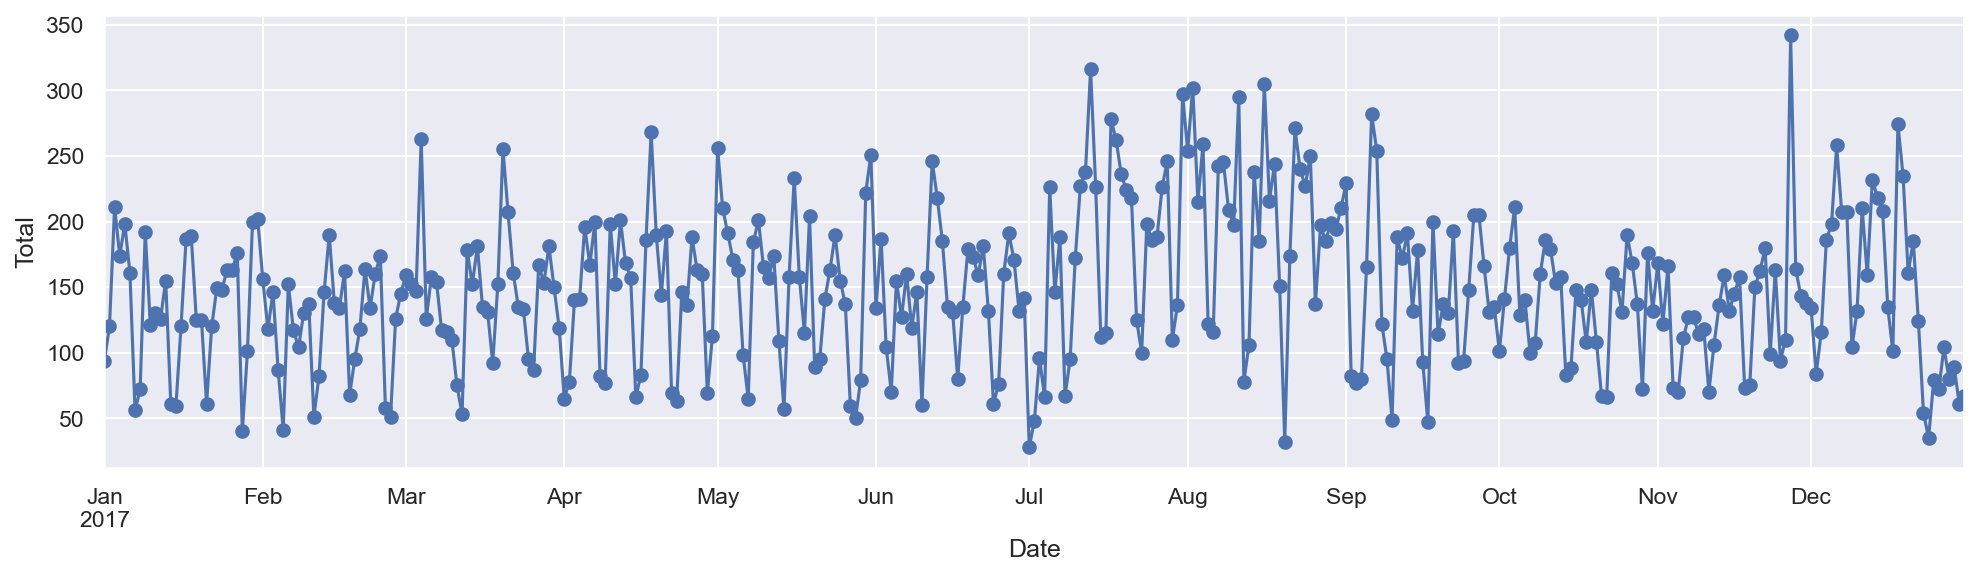

In [54]:
ax =df.loc['2017-01':'2017-12','Transaction ID'].plot(marker='o',linestyle='-')
ax.set_ylabel('Total');

In [55]:
df.loc['2017-01':'2017-12','Transaction ID'].sum()

54144

Pada bulan juli hingga bulan september mengalami fluktuasi transaksi online per hari daripada bulan lainnya. Dan transaksi online per hari yang lebih tinggi terjadi pada bulan desember dengan total hampir mendekati 350. Untuk transaksi terendah ada pada bulan Juli, September, dan December. Jika dibandingkan dengan Quantity barang terjual Online, bisa disimpulkan bahwa dengan banyaknya jumlah transaksi belum tentu akan menambah quantity pembelian barangnya.

## Jumlah transaksi offline perhari 

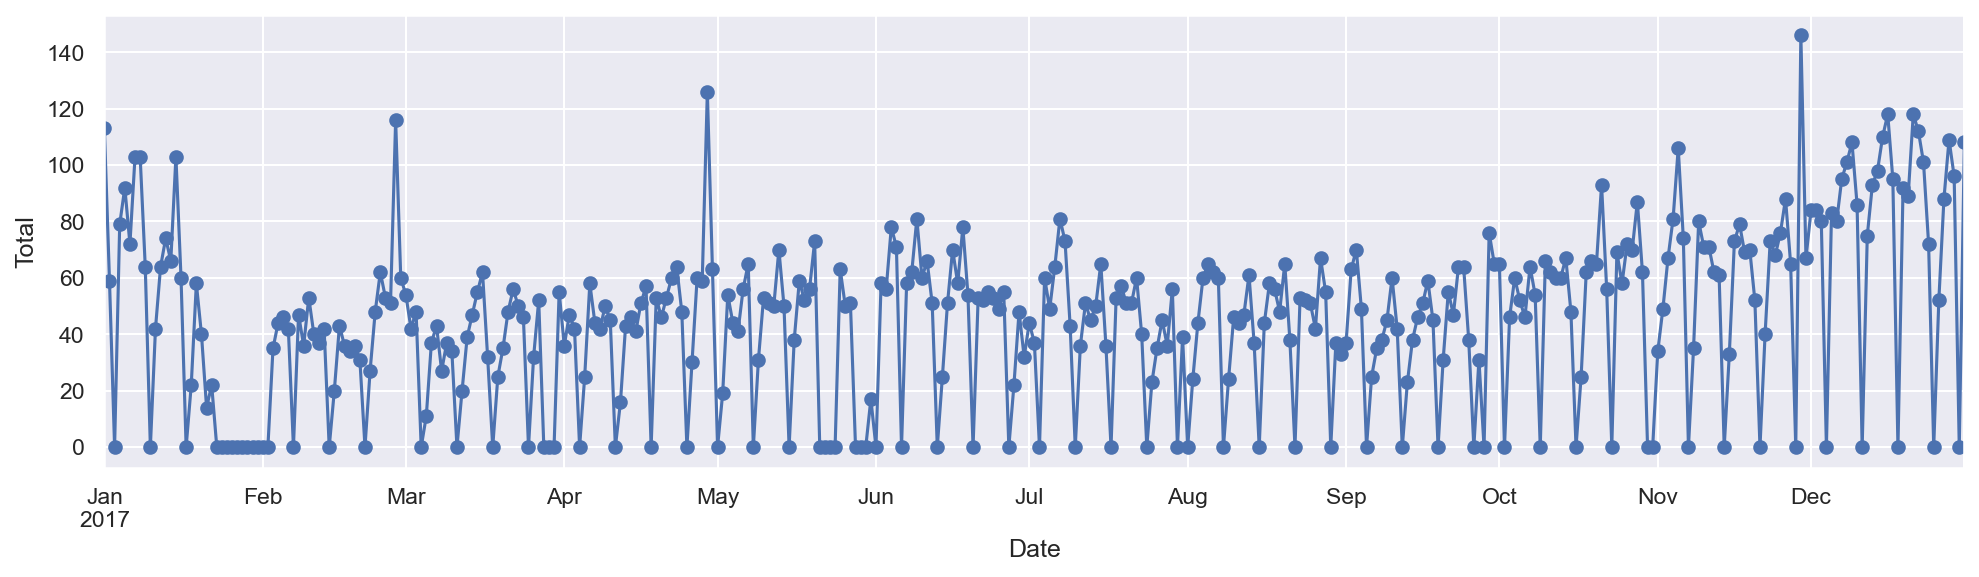

In [56]:
ax =df.loc['2017-01':'2017-12','InvoiceNo'].plot(marker='o',linestyle='-')
ax.set_ylabel('Total');

In [57]:
df.loc['2017-01':'2017-12','InvoiceNo'].sum()

16522.0

## Penjualan Online Berdasarkan Harinya

In [58]:
fig =px.line(x=df.loc['2017-01':'2017-12'].index, y=df.loc['2017-01':'2017-12']['Transaction ID'],markers=True,text= df.loc['2017-01':'2017-12']['Hari'])
fig.show()

Terjadinya Transaksi yang paling banyak terjadi pada weekday(Monday,Tuesday,Wednesday,Thursday) sedangkan pada Weekend(Saturday,Sunday) terjadi sedikit transaksi.

## Perbandingan Kategori Promosi Offline

In [59]:
Q_Off = df.groupby(['Offline_Spend_Cat'])['Quarter'].count()
Q_Off.head()

Offline_Spend_Cat
High      211
Low        28
Medium    126
Name: Quarter, dtype: int64

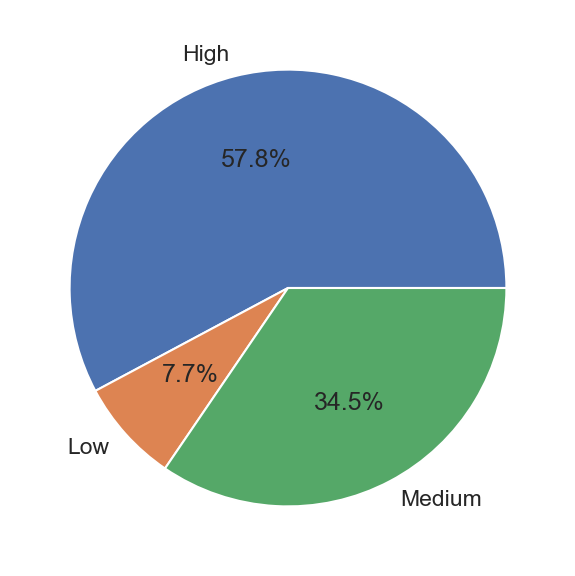

In [60]:
plt.pie([211,28,126], labels = ['High','Low','Medium'], autopct='%1.1f%%')
plt.tight_layout()
plt.show()

Dari data diatas, dapat diketahui bahwa banyak kategori High promosi offline artinya pengeluaran promosi offline dilakukan dengan dana yang tinggi dimana pengeluaran promosi offline terjadi sekitar 3000 keatas yaitu sebesar 57,8% atau terjadi pengeluaran promosi offline tinggi pada  211 hari dari 365 hari.

## Perbandingan Kategori Promosi Online

In [61]:
Q_On = df.groupby(['Online_Spend_Cat'])['Quarter'].count()
Q_On.head()

Online_Spend_Cat
High       31
Low       124
Medium    210
Name: Quarter, dtype: int64

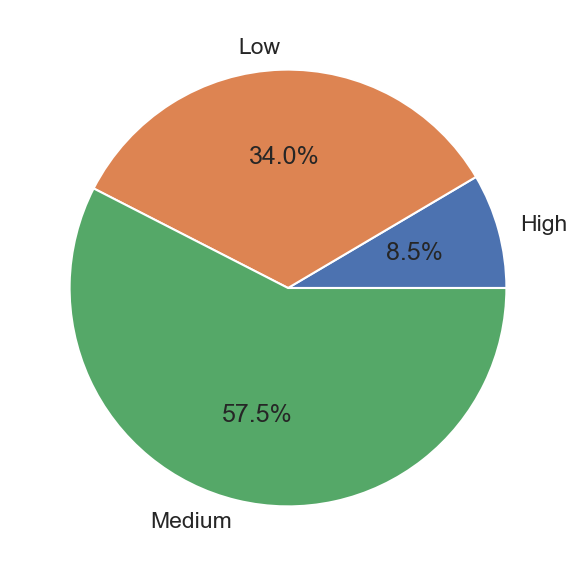

In [62]:
plt.pie([31,124,210], labels = ['High','Low','Medium'], autopct='%1.1f%%')
plt.tight_layout()
plt.show()

Berbeda dengan pengeluaran promosi offline, diketahui pengeluaran Promosi Online banyak terdapat kategori Medium yang artinya pengeluaran promosi online dilakukan dengan dana dengan rentang pengeluaran sekitar 1500 hingga 3000 yaitu sekitar 57,6 % atau terjadi pada 210 hari dari 365 hari.

## (Belum) Total Barang Terjual

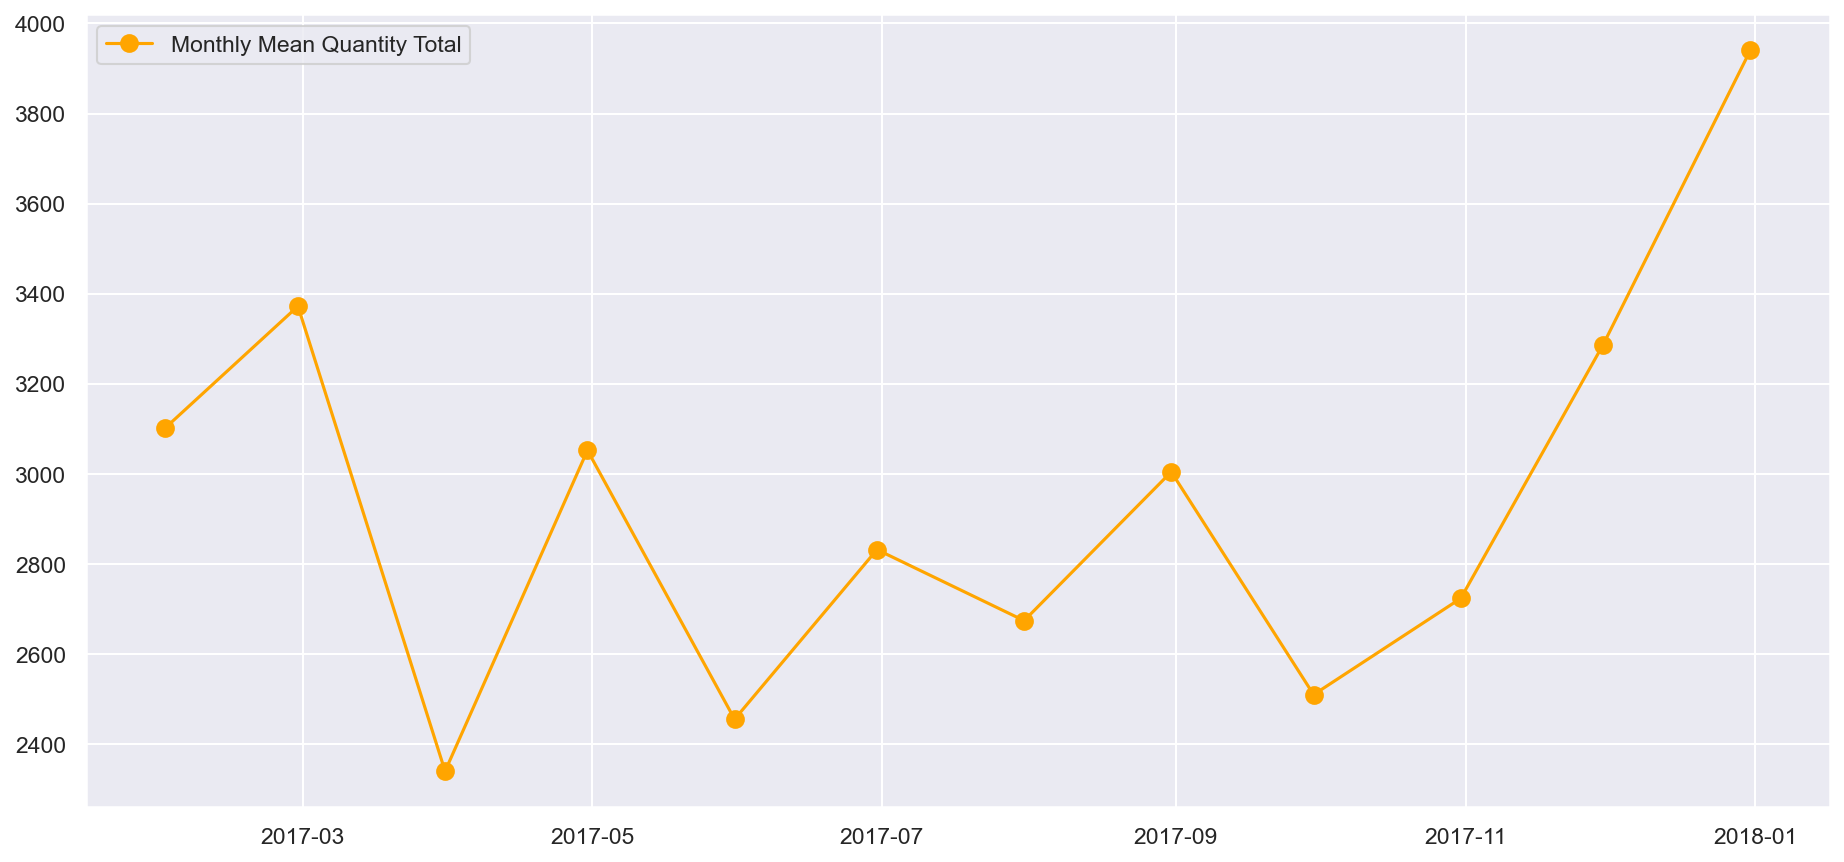

In [63]:
start,end= '2017-01','2017-12'
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(df['Quantity_Total'].resample('M').mean().loc[start:end],marker='o', markersize=8, linestyle='-', label='Monthly Mean Quantity Total', color='orange')
ax.legend()

## (Belum) Total Pengeluaran untuk pemasaran

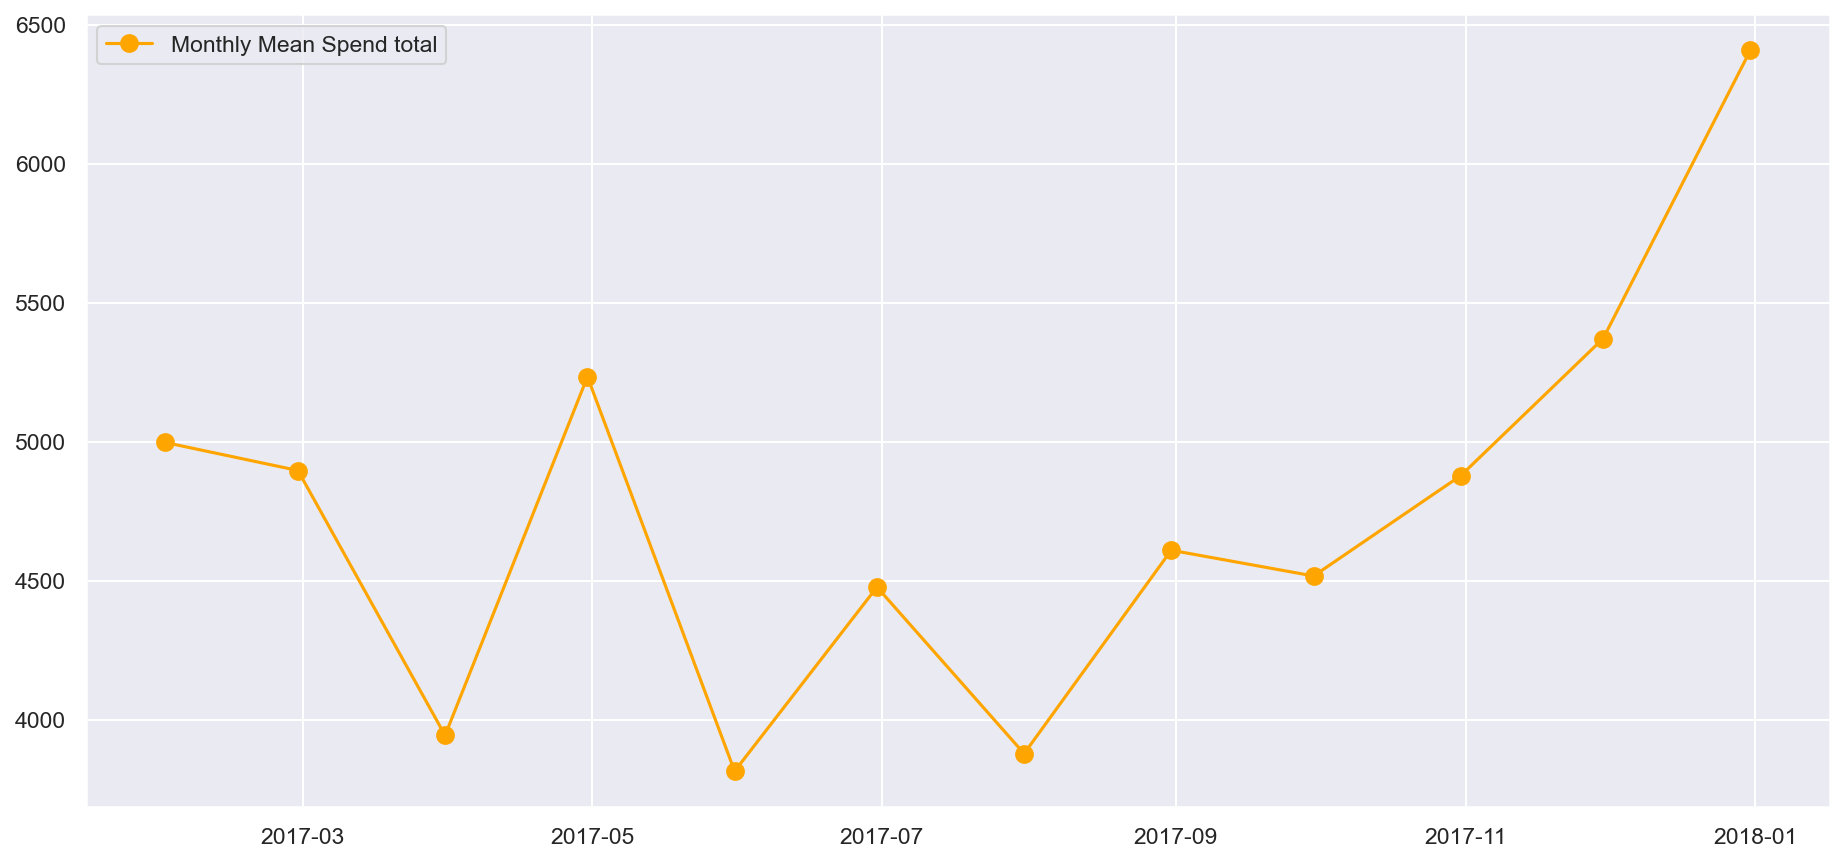

In [64]:
start,end= '2017-01','2017-12'
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(df['Spend_total'].resample('M').mean().loc[start:end],marker='o', markersize=8, linestyle='-', label='Monthly Mean Spend total', color='orange')
ax.legend()

## (Belum) Perbandingan pengeluaran untuk pemasaran secara offline dan online

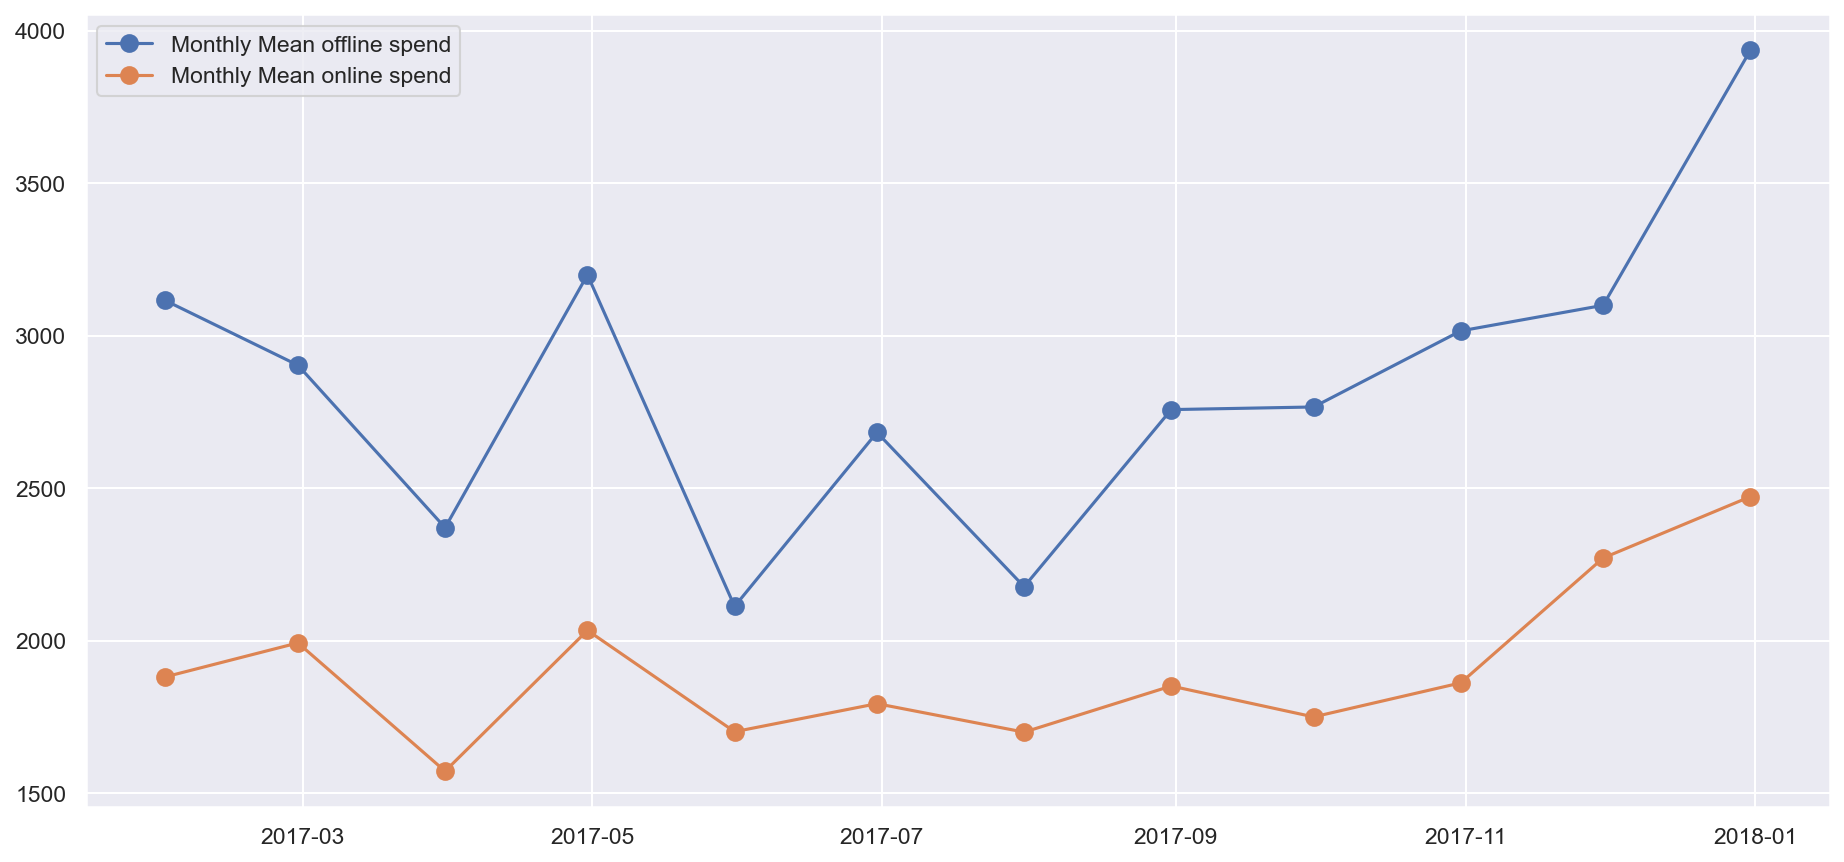

In [65]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(df['Offline Spend'].resample('M').mean().loc[start:end],marker='o', markersize=8, linestyle='-', label='Monthly Mean offline spend')
ax.plot(df['Online Spend'].resample('M').mean().loc[start:end],marker='o', markersize=8, linestyle='-', label='Monthly Mean online spend')
ax.legend()

## 10 Hari dengan Pendapatan Penjualan Online terbaik

In [67]:
Best_In = df.groupby(['Date', 'Hari'])['Best Income Online'].sum()
Best_In.sort_values(ascending = False, inplace=True)
print(Best_In.head(10))

Date        Hari     
2017-07-13  Thursday     59382.46
2017-04-05  Wednesday    48727.62
2017-04-18  Tuesday      47458.26
2017-02-14  Tuesday      43989.87
2017-08-02  Wednesday    42082.88
2017-09-13  Wednesday    40825.31
2017-07-18  Tuesday      29468.05
2017-09-01  Friday       26168.64
2017-04-07  Friday       18340.18
2017-06-28  Wednesday    14649.59
Name: Best Income Online, dtype: float64


Dapar dilihat bahwa 10 hari pendapatan terbaik terjadi pada Weekday. Pada Hari Kamis, 13 Juli 2017 mengalami pendapatan yang paling besar sekitar 59382.46.

## 3 Bulan dengan Pendapatan online terbaik

In [68]:
Best_In_m = df.groupby(['Month'])['Best Income Online'].sum()
Best_In_m.sort_values(ascending = False, inplace=True)
print(Best_In_m.head(3))

Month
4    201166.67
7    162425.96
8    134016.92
Name: Best Income Online, dtype: float64


3 Bulan dengan Pendapatan Terbaik yaitu Bulan April, Juli dan Agustus sebesar 201166.67, 162425.96 dan 134016.92. 

## 3 Bulan dengan Pendapatan online terendah

In [69]:
Low_In_m = df.groupby(['Month'])['Best Income Online'].sum()
Low_In_m.sort_values(ascending = False, inplace=True)
print(Low_In_m.tail(3))

Month
10    77262.54
6     69336.54
5     67978.86
Name: Best Income Online, dtype: float64


## 3 Product tertinggi Berdasarkan Penjualannya Perbulan

In [161]:
Best_Product = df.groupby(['Month','Letter of Product SKU'])['Letter of Product SKU'].count().to_frame().rename(columns={"Letter of Product SKU": "Jumlah"})
Best_Product.reset_index(inplace = True)

Coba = [ 2,  3,  5, 12,  1, 23, 22,  4, 18,  7,  6,  9, 11, 16, 19, 17]
np.sort(Coba)

#define values
values = [22, 23]

#drop rows that contain any value in the list
Best_Product = Best_Product[Best_Product.Jumlah.isin(values) == True]

Best_Product

Month Letter of Product SKU  Jumlah
12      2              GGOEYFKQ      23
20      3              GGOEYFKQ      22
58      8              GGOEYOLR      23

3 Bulan dengan Pendapatan Terendah yaitu Bulan April, Juli dan Agustus sebesar 77262.54, 69336.54 dan 67978.86.

# Kesimpulan dan Saran :

setelah dianalisis maka didapatkan kesimpulan sebagai berikut:

- pada bulan oktober mulai terjadi peningkatan pada penjualan barang secara offline maupun online
- pada pengeluaran untuk pemasaran juga terjadi peningkatan mulai dari bulan oktober, sehingga bisa dikatakan upaya pemasaran yang dilakukan untuk peningkatan penjualan sangat berpengaruh
- kenaikan dan penurunan pengeluaran secara offline dan online terlihat hampir mirip, tetapi berbeda pada jumlah pengeluarannya. lebih banyak untuk pengeluaran pemasaran secara offline
- didapatkan juga jumlah transaksi offline tiap hari dalam setahun lebih sedikit dibandingkan jumlah transaksi online setiap harinya. tetapi jumlah barang yang terjual secara offline lebih banyak dibandingkan barang yang terjual secara online setiap harinya. sehingga disimpulkan orang yang membeli secara offline, setiap orangnya membeli produk lebih banyak dibandingkan setiap orang yang membeli secara online

- Selain membuat Customer 360° degree, perusahaan juga direkomendasikan membuat 360 degree Digital Marketeting. pemasaran 360 Degree Digital Marketing sangat penting karena ketika sebuah merek ingin menampilkan citra barunya di pasar dengan konsumen tertarget. Kampanye pemasaran 360 ​​derajat akan membantu menciptakan kesan baru di benak konsumen. Strategi ini sangat bermanfaat untuk melakukan kampanye pemasaran selama musim liburan, bulan ramadhan, tahun baru atau untuk moment tertentu. Di waktu-waktu ini, pemasaran menjadi lebih efektif untuk menarik minat para pelanggan. Untuk merancang pemasaran 360 derajat di dalam dunia digital marketing yang efektif, perlu fokus pada hal-hal berikut : Membuat Website, Content Marketing, Media sosial, Acara Kontes, Komunitas dan Pameran, dan Pemasaran Tradisional